In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
#from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression


import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
#from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [34]:
import time

## Import from file

In [35]:
res = []
for i in "abcdefghi":
    data = np.genfromtxt("./testdata/xa{}.dat".format(i),
                     skip_header=0,
                     skip_footer=0,
                     names=None,
                     dtype=None,
                     delimiter=' ')
    res += list(data)

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Temp\ipykernel_25324\1410727338.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt("./testdata/xa{}.dat".format(i),


## Make the dataset

In [36]:
y=[]
x=[]
for i in range(len(res)):
    y.append(bytes.decode(res[i][-1],"utf8"))
    x.append(list(res[i])[:-1])

## Check for any missing features in testset

In [37]:
for i in range(len(x)):
    if(len(x[i]) != 18):
        print("index {} has a problem :(".format(i))

## Train Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)


## Check if the dataset is balanced

In [39]:
opel=0
saab=0
bus=0
van=0

class_num = {
    'opel' : 0,
    'saab' : 0,
    'bus'  : 0,
    'van'  : 0
}

for i in range(len(y)):
    class_num[y[i]]+=1

In [40]:
class_num
#dataset is balanced

{'opel': 212, 'saab': 217, 'bus': 218, 'van': 199}

## Dummy Classifier

In [41]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_bus = DummyClassifier(strategy="constant", constant='bus')
dc_constant_saab = DummyClassifier(strategy="constant", constant='saab')
dc_constant_opel = DummyClassifier(strategy="constant", constant='opel')
dc_constant_van = DummyClassifier(strategy="constant", constant='van')
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [42]:
# hold times for train and pred of out of the box
train_time_base = {}
pred_time_base = {}

In [43]:
# dictionary to store all classifier without optimization preds
predictions = {}

# with the fit method we train the classifier with the train set
# with the predict method predictions occur based on the input data

start_time = time.time()
dc_uniform.fit(X_train, y_train)
train_time_base["DC Uniform"] = time.time() - start_time

start_time = time.time()
predictions["DC Uniform"] = dc_uniform.predict(X_test)
pred_time_base["DC Uniform"] = time.time() - start_time

start_time = time.time()
dc_constant_bus.fit(X_train, y_train)
train_time_base["DC Constant bus"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant bus"] = dc_constant_bus.predict(X_test)
pred_time_base["DC Constant bus"] = time.time() - start_time

start_time = time.time()
dc_constant_saab.fit(X_train, y_train)
train_time_base["DC Constant saab"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant saab"] = dc_constant_saab.predict(X_test)
pred_time_base["DC Constant saab"] = time.time() - start_time

start_time = time.time()
dc_constant_opel.fit(X_train, y_train)
train_time_base["DC Constant opel"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant opel"] = dc_constant_opel.predict(X_test)
pred_time_base["DC Constant opel"] = time.time() - start_time

start_time = time.time()
dc_constant_van.fit(X_train, y_train)
train_time_base["DC Constant van"] = time.time() - start_time

start_time = time.time()
predictions["DC Constant van"] = dc_constant_van.predict(X_test)
pred_time_base["DC Constant van"] = time.time() - start_time

start_time = time.time()
dc_most_frequent.fit(X_train, y_train)
train_time_base["DC Most Frequent"] = time.time() - start_time

start_time = time.time()
predictions["DC Most Frequent"] = dc_most_frequent.predict(X_test)
pred_time_base["DC Most Frequent"] = time.time() - start_time

start_time = time.time()
dc_stratified.fit(X_train, y_train)
train_time_base["DC Stratified"] = time.time() - start_time

start_time = time.time()
predictions["DC Stratified"] = dc_stratified.predict(X_test)
pred_time_base["DC Stratified"] = time.time() - start_time

## Gaussian Naive Bayes (GNB)

In [44]:
gnb = GaussianNB()

start_time = time.time()
gnb.fit(X_train, y_train)
train_time_base["GNB"] = time.time() - start_time

start_time = time.time()
predictions["GNB"] = gnb.predict(X_test)
pred_time_base["GNB"] = time.time() - start_time

## K Nearest Neighbours (kNN)

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
train_time_base["KNN"] = time.time() - start_time

start_time = time.time()
predictions["KNN"] = knn.predict(X_test)
pred_time_base["KNN"] = time.time() - start_time

## Logistic Regression (LR)

In [46]:
logisticRegr = LogisticRegression()

start_time = time.time()
logisticRegr.fit(X_train, y_train)
train_time_base["LR"] = time.time() - start_time

start_time = time.time()
predictions["LR"] = logisticRegr.predict(X_test)
pred_time_base["LR"] = time.time() - start_time

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Metrics

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

accuracy = {}
f1 = {}

def metrics_info(classifier_name, preds):
  global accuracy, f1 
  accuracy[classifier_name] = accuracy_score(y_test, preds)
  f1[classifier_name] = f1_score(y_test, preds, average = "macro")

# print bar plot function
def bar_plot(classifiers, scores, title):
  plt.figure(figsize = (10,6))
  y_pos = np.arange(len(classifiers))
  plt.bar(y_pos, scores, align='center', alpha = 0.9)
  plt.xticks(y_pos, classifiers, rotation = 45)
  plt.ylabel('Score')
  plt.title(title)
  plt.show()

In [48]:
# Dummy Metrics
metrics_info("DC Uniform", predictions["DC Uniform"])
metrics_info("DC Constant opel", predictions["DC Constant opel"])
metrics_info("DC Constant saab", predictions["DC Constant saab"])
metrics_info("DC Constant bus", predictions["DC Constant bus"])
metrics_info("DC Constant van", predictions["DC Constant van"])
metrics_info("DC Most Frequent", predictions["DC Most Frequent"])
metrics_info("DC Stratified", predictions["DC Stratified"])

In [49]:
# GNB Metrics
metrics_info("GNB", predictions["GNB"])

In [50]:
# KNN
metrics_info("KNN", predictions["KNN"])

In [51]:
# LR
metrics_info("LR", predictions["LR"])

In [52]:
data = []
data.append(list(accuracy.values()))
data.append(list(f1.values()))

pd.DataFrame(data, index = ["Accuracy Score", "F1 Score"], columns = list(accuracy.keys()))

,DC Uniform,DC Constant opel,DC Constant saab,DC Constant bus,DC Constant van,DC Most Frequent,DC Stratified,GNB,KNN,LR
Accuracy Score,0.271654,0.236220,0.287402,0.244094,0.232283,0.244094,0.248031,0.444882,0.661417,0.732283
F1 Score,0.269410,0.095541,0.111621,0.098101,0.094249,0.098101,0.245601,0.409476,0.659615,0.728670


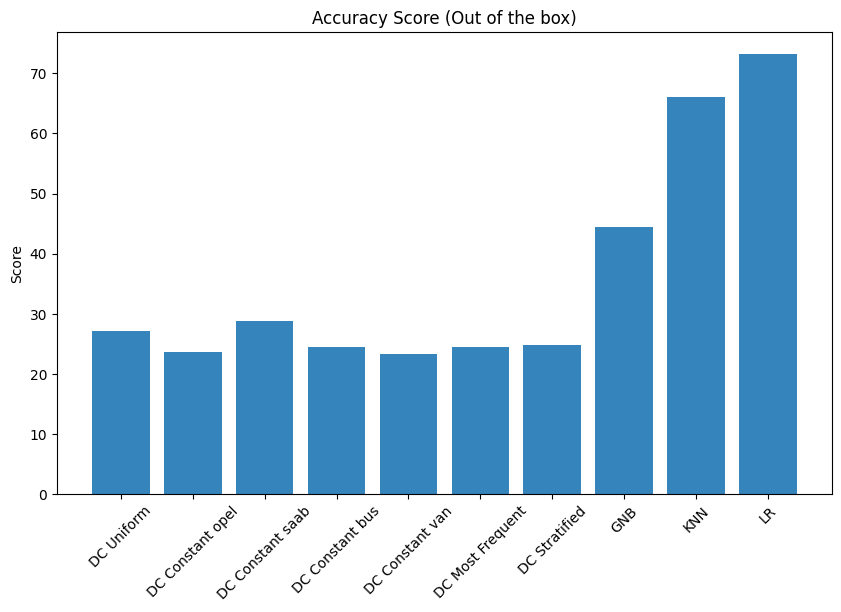

In [53]:
classifier_labels = list(accuracy.keys())
classifier_accuracy = list(accuracy.values())
classifier_f1 = list(f1.values())

bar_plot(classifier_labels, [i*100 for i in classifier_accuracy], "Accuracy Score (Out of the box)")

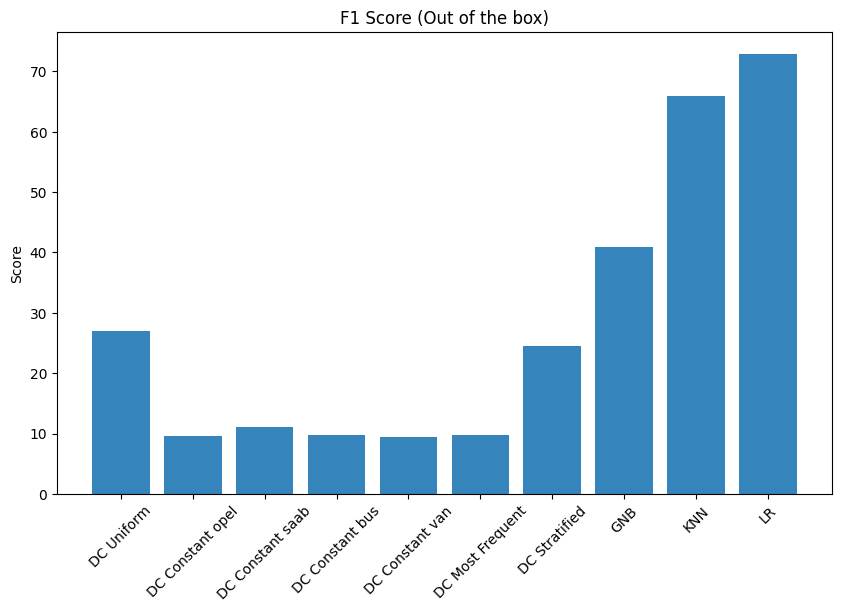

In [54]:
bar_plot(classifier_labels, [i*100 for i in classifier_f1], "F1 Score (Out of the box)")

## Data Preprossecing

In [55]:
selector = VarianceThreshold(threshold=100)
train_reduced = selector.fit_transform(X_train)
mask = selector.get_support()
test_reduced = np.array(X_test)[:,mask]

print(len(train_reduced[0]), len(X_train[0]), len(test_reduced[0]))


7 18 7


In [56]:
def classfication(X_train,y_train,X_test,y_test):
    
    
    dc_uniform = DummyClassifier(strategy="uniform")
    dc_constant_bus = DummyClassifier(strategy="constant", constant='bus')
    dc_constant_saab = DummyClassifier(strategy="constant", constant='saab')
    dc_constant_opel = DummyClassifier(strategy="constant", constant='opel')
    dc_constant_van = DummyClassifier(strategy="constant", constant='van')
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    dc_stratified = DummyClassifier(strategy="stratified")

    # hold times for train and pred of out of the box
    train_time_base = {}
    pred_time_base = {}
    # dictionary to store all classifier without optimization preds
    predictions = {}

    # with the fit method we train the classifier with the train set
    # with the predict method predictions occur based on the input data

    start_time = time.time()
    dc_uniform.fit(X_train, y_train)
    train_time_base["DC Uniform"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Uniform"] = dc_uniform.predict(X_test)
    pred_time_base["DC Uniform"] = time.time() - start_time

    start_time = time.time()
    dc_constant_bus.fit(X_train, y_train)
    train_time_base["DC Constant bus"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Constant bus"] = dc_constant_bus.predict(X_test)
    pred_time_base["DC Constant bus"] = time.time() - start_time

    start_time = time.time()
    dc_constant_saab.fit(X_train, y_train)
    train_time_base["DC Constant saab"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Constant saab"] = dc_constant_saab.predict(X_test)
    pred_time_base["DC Constant saab"] = time.time() - start_time

    start_time = time.time()
    dc_constant_opel.fit(X_train, y_train)
    train_time_base["DC Constant opel"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Constant opel"] = dc_constant_opel.predict(X_test)
    pred_time_base["DC Constant opel"] = time.time() - start_time

    start_time = time.time()
    dc_constant_van.fit(X_train, y_train)
    train_time_base["DC Constant van"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Constant van"] = dc_constant_van.predict(X_test)
    pred_time_base["DC Constant van"] = time.time() - start_time

    start_time = time.time()
    dc_most_frequent.fit(X_train, y_train)
    train_time_base["DC Most Frequent"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Most Frequent"] = dc_most_frequent.predict(X_test)
    pred_time_base["DC Most Frequent"] = time.time() - start_time

    start_time = time.time()
    dc_stratified.fit(X_train, y_train)
    train_time_base["DC Stratified"] = time.time() - start_time

    start_time = time.time()
    predictions["DC Stratified"] = dc_stratified.predict(X_test)
    pred_time_base["DC Stratified"] = time.time() - start_time


    logisticRegr = LogisticRegression()

    start_time = time.time()
    logisticRegr.fit(X_train, y_train)
    train_time_base["LR"] = time.time() - start_time

    start_time = time.time()
    predictions["LR"] = logisticRegr.predict(X_test)
    pred_time_base["LR"] = time.time() - start_time


    gnb = GaussianNB()
    start_time = time.time()
    gnb.fit(X_train, y_train)
    train_time_base["GNB"] = time.time() - start_time

    start_time = time.time()
    predictions["GNB"] = gnb.predict(X_test)
    pred_time_base["GNB"] = time.time() - start_time

    knn = KNeighborsClassifier(n_neighbors=3)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time_base["KNN"] = time.time() - start_time
    
    start_time = time.time()
    predictions["KNN"] = knn.predict(X_test)
    pred_time_base["KNN"] = time.time() - start_time


    metrics_info("DC Uniform", predictions["DC Uniform"])
    metrics_info("DC Constant opel", predictions["DC Constant opel"])
    metrics_info("DC Constant saab", predictions["DC Constant saab"])
    metrics_info("DC Constant bus", predictions["DC Constant bus"])
    metrics_info("DC Constant van", predictions["DC Constant van"])
    metrics_info("DC Most Frequent", predictions["DC Most Frequent"])
    metrics_info("DC Stratified", predictions["DC Stratified"])
    metrics_info("GNB", predictions["GNB"])
    metrics_info("KNN", predictions["KNN"])
    metrics_info("LR", predictions["LR"])
    classifier_labels = list(accuracy.keys())
    classifier_accuracy = list(accuracy.values())
    classifier_f1 = list(f1.values())

        
    data = []
    data.append(list(accuracy.values()))
    data.append(list(f1.values()))

    print(pd.DataFrame(data, index = ["Accuracy Score", "F1 Score"], columns = list(accuracy.keys())))
    
    bar_plot(classifier_labels, [i*100 for i in classifier_accuracy], "Accuracy Score (Out of the box)")
    bar_plot(classifier_labels, [i*100 for i in classifier_f1], "F1 Score (Out of the box)")
    

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                DC Uniform  DC Constant opel  DC Constant saab  \
Accuracy Score    0.212598          0.236220          0.287402   
F1 Score          0.209202          0.095541          0.111621   

                DC Constant bus  DC Constant van  DC Most Frequent  \
Accuracy Score         0.244094         0.232283          0.244094   
F1 Score               0.098101         0.094249          0.098101   

                DC Stratified       GNB       KNN        LR  
Accuracy Score       0.275591  0.397638  0.622047  0.618110  
F1 Score             0.274423  0.342109  0.625455  0.612571  


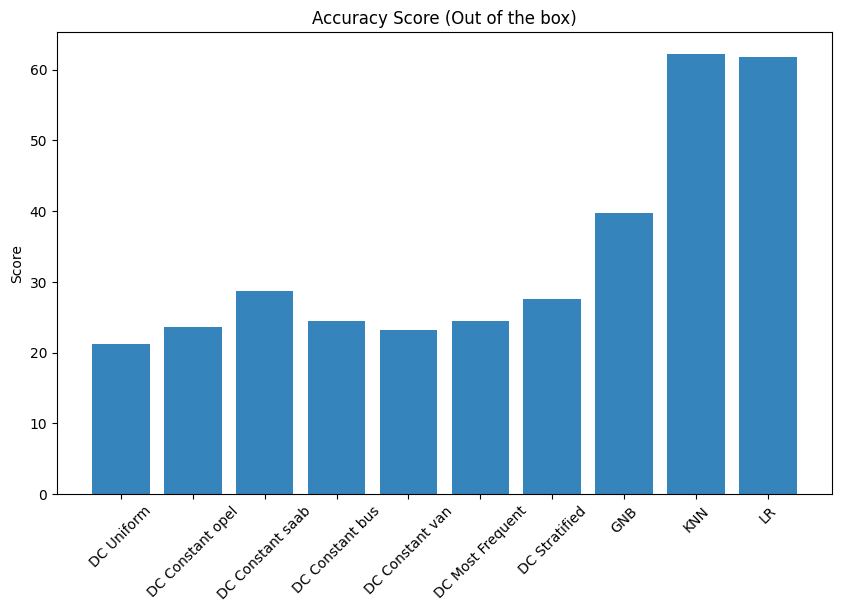

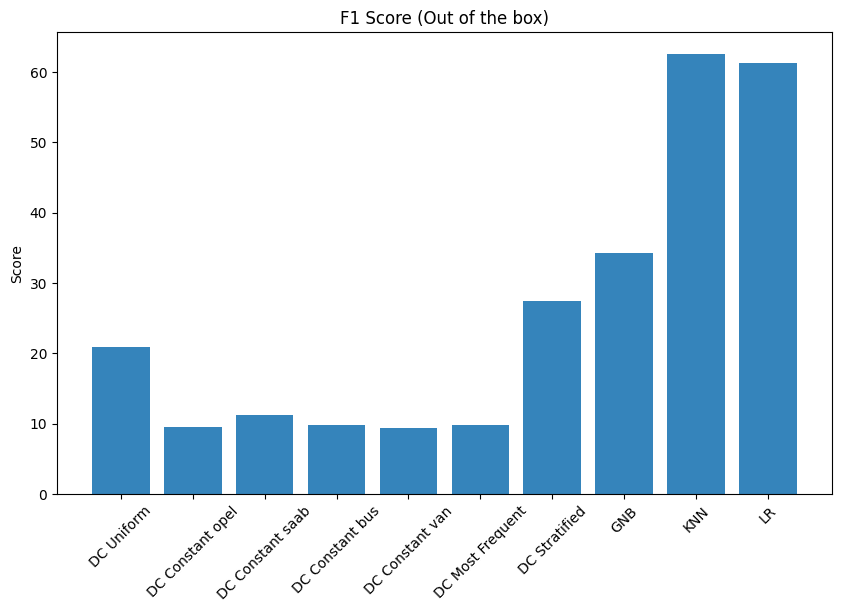

In [57]:
classfication(train_reduced,y_train,test_reduced,y_test)

## Pipelines

In [59]:
from imblearn.pipeline import Pipeline

In [60]:
from sklearn import neighbors

In [61]:
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = [StandardScaler(),MinMaxScaler()]
ros = [RandomOverSampler(),RandomUnderSampler()]
pca = PCA()

# KNN
knn = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
# GNB
gnb = GaussianNB()
# Logistic Regression
lr = LogisticRegression()

pipes_to_try = [[('selector', selector)]]

for s in scaler:
    pipes_to_try.append(pipes_to_try[0]+[('scaler',s)])

for i in range(1,len(pipes_to_try)):
    pipes_to_try.append(pipes_to_try[i]+[('sampler',ros[0])])
    pipes_to_try.append(pipes_to_try[i]+[('sampler',ros[1])])

for i in range(3,7):
    pipes_to_try.append(pipes_to_try[i]+[('pca',pca)])

classifiers = [('kNN',knn),('GNB',gnb),('Logistic Regression',lr)]
parallels = []

for c in classifiers:
    best = 0
    best_parallel = []
    preds_for_metrics = []
    fit_time = 0
    pred_time = 0        
    for i in pipes_to_try:
        pipe_test = Pipeline(steps = i+[c])
        timer = time.time()
        pipe_test.fit(X_train,y_train)
        demo_fit_time = time.time() - timer
        timer = time.time()
        pred = pipe_test.predict(X_test)
        demo_pred_time = time.time() - timer
        score = f1_score(y_test,pred,average='macro')
        if(score > best):
            best = score
            preds_for_metrics=pred
            best_parallel = i
            fit_time = demo_fit_time
            pred_time = demo_pred_time
        
    parallels.append((c[0],best_parallel))
    print("best parallel for classifier {} = {}".format(c[0],best_parallel))
    print(classification_report(y_test, preds_for_metrics))
    print("fit time = {} ||| prediction time = {}".format(fit_time,pred_time))



best parallel for classifier kNN = [('selector', VarianceThreshold()), ('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('pca', PCA())]
              precision    recall  f1-score   support

         bus       0.90      1.00      0.95        62
        opel       0.49      0.53      0.51        60
        saab       0.60      0.49      0.54        73
         van       0.85      0.86      0.86        59

    accuracy                           0.71       254
   macro avg       0.71      0.72      0.71       254
weighted avg       0.71      0.71      0.71       254

fit time = 0.010532855987548828 ||| prediction time = 0.023165225982666016
best parallel for classifier GNB = [('selector', VarianceThreshold()), ('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('pca', PCA())]
              precision    recall  f1-score   support

         bus       0.97      0.94      0.95        62
        opel       0.57      0.65      0.60        60
        saab       0.69  

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best parallel for classifier Logistic Regression = [('selector', VarianceThreshold()), ('scaler', StandardScaler()), ('sampler', RandomOverSampler())]
              precision    recall  f1-score   support

         bus       0.91      0.97      0.94        62
        opel       0.67      0.62      0.64        60
        saab       0.76      0.70      0.73        73
         van       0.88      0.98      0.93        59

    accuracy                           0.81       254
   macro avg       0.81      0.82      0.81       254
weighted avg       0.80      0.81      0.81       254

fit time = 0.04820966720581055 ||| prediction time = 0.0010616779327392578


C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
parallels

[('kNN',
  [('selector', VarianceThreshold()),
   ('scaler', StandardScaler()),
   ('sampler', RandomOverSampler()),
   ('pca', PCA())]),
 ('GNB',
  [('selector', VarianceThreshold()),
   ('scaler', StandardScaler()),
   ('sampler', RandomOverSampler()),
   ('pca', PCA())]),
 ('Logistic Regression',
  [('selector', VarianceThreshold()),
   ('scaler', StandardScaler()),
   ('sampler', RandomOverSampler())])]

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         bus       0.75      0.87      0.81        62
        opel       0.62      0.43      0.51        60
        saab       0.65      0.58      0.61        73
         van       0.76      0.97      0.85        59

    accuracy                           0.70       254
   macro avg       0.69      0.71      0.69       254
weighted avg       0.69      0.70      0.69       254



## GridsearchCV

In [76]:
train_variance = np.array(X_train).var(axis=0)
print(train_variance)
print(np.max(train_variance))

[6.85198594e+01 3.85890448e+01 2.46469204e+02 1.14819608e+03
 7.11972243e+01 2.43669164e+01 1.11474566e+03 6.07984386e+01
 6.80676760e+00 2.13487023e+02 1.00764827e+03 3.16678089e+04
 1.07072824e+03 6.14235727e+01 2.39404218e+01 8.04217951e+01
 3.73644511e+01 5.58614751e+01]
31667.808881939396


In [73]:
maxvar = np.max(train_variance)
minvar = np.min(train_variance)
print(maxvar)
print(minvar)

31667.808881939396
6.806767599525212


In [147]:
from sklearn.model_selection import GridSearchCV

vthreshold = list(np.arange(start = 30, stop = 50, step = 2))
print(vthreshold)
n_components = [11,12,13,14,15]
k = [10, 11, 15, 17, 20] # η υπερπαράμετρος του ταξινομητή

[30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


In [148]:
neighbors_pipe = Pipeline(steps=parallels[0][1]+[('knn',knn)], memory='tmp')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler[0]), ('sampler', ros[0]), ('pca', pca), ('kNN', knn)], memory = 'tmp')
print(parallels[0][1]+[('knn',knn)])

[('selector', VarianceThreshold()), ('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('pca', PCA()), ('knn', KNeighborsClassifier(n_jobs=-1))]


In [149]:
knn_dict = {}
knn_dict["kNN__neighbors"] = n_components

In [150]:
dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k)

{'selector__threshold': [30, 32, 34, 36, 38, 40, 42, 44, 46, 48],
 'pca__n_components': [11, 12, 13, 14, 15],
 'kNN__n_neighbors': [10, 11, 15, 17, 20]}

In [151]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=3, scoring='f1_macro', n_jobs=-1)

In [152]:
estimator.fit(X_train,y_train)

C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
170 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ΒΑΣΙΛΗΣ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

GridSearchCV(cv=3,
             estimator=Pipeline(memory='tmp',
                                steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [10, 11, 15, 17, 20],
                         'pca__n_components': [11, 12, 13, 14, 15],
                         'selector__threshold': [30, 32, 34, 36, 38, 40, 42, 44,
                                                 46, 48]},
             scoring='f1_macro')

In [154]:
estimator.best_score_

0.6905890628646004